## Code for CPSC 393 Assignment #1

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Importing & exploring data

In [3]:
iris = pd.read_csv('iris.csv').drop(columns = ['Id'])
print(iris.info())

# splits dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(iris[iris.columns[:-1]], iris['Species'], test_size=0.3, random_state=514) # 70% training and 30% test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


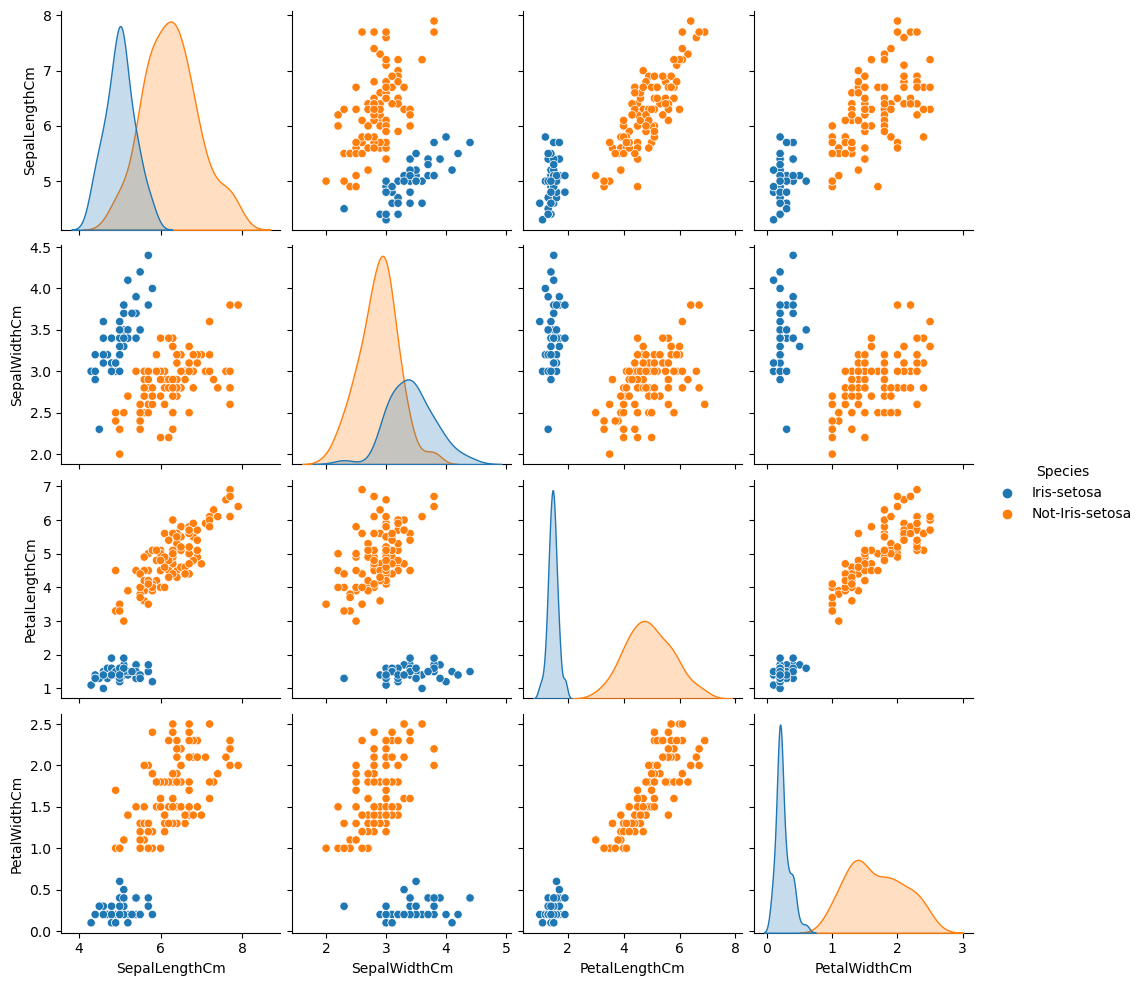

In [4]:
sns.pairplot(iris, hue = 'Species')

### Creating a 4-dimensional SVM classifier using all features

In [5]:
model = svm.SVC(kernel='linear') 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='Iris-setosa'))
# Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='Iris-setosa'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Building two 2D SVM models to visualize linear separability

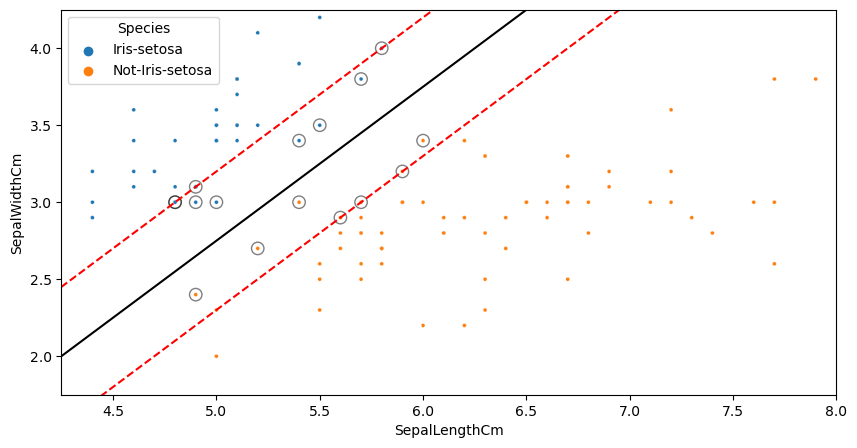

In [25]:
sepals = ['SepalLengthCm', 'SepalWidthCm']
plt.figure(figsize=(10,5))

# creates a 2-dimensional svm classifier using SetalLengthCm and SetalWidthCm only
sepal_model = svm.SVC(kernel='linear') 
sepal_model.fit(X_train[sepals], y_train)
y_pred_sepal = sepal_model.predict(X_test[sepals])

sns.scatterplot(x=X_train[sepals[0]], y=X_train[sepals[1]], hue=y_train, s=8);

# builds & plots decision boundary hyperplane
w1 = sepal_model.coef_[0]
w_hat1 = sepal_model.coef_[0] / (np.sqrt(np.sum(sepal_model.coef_[0] ** 2)))
b1 = sepal_model.intercept_[0]
x_points1 = np.linspace(4, 8)
y_points1 = -(w1[0] / w1[1]) * x_points1 - b1 / w1[1]
plt.plot(x_points1, y_points1, c='black');

# circles support vectors
plt.scatter(sepal_model.support_vectors_[:, 0], sepal_model.support_vectors_[:, 1], 
            s=80, facecolors='none', edgecolors='k', alpha=.5);

# calculates & plots margin lines
margin1 = 1 / np.sqrt(np.sum(sepal_model.coef_[0] ** 2))
decision_boundary_points1 = np.array(list(zip(x_points1, y_points1)))
points_of_line_above1 = decision_boundary_points1 + w_hat1 * margin1
points_of_line_below1 = decision_boundary_points1 - w_hat1 * margin1

plt.plot(points_of_line_above1[:, 0], points_of_line_above1[:, 1], 'r--', linewidth=1.5)
plt.plot(points_of_line_below1[:, 0], points_of_line_below1[:, 1], 'r--',linewidth=1.5)
plt.ylim(bottom=1.75, top=4.25)
plt.xlim(left=4.25, right=8);

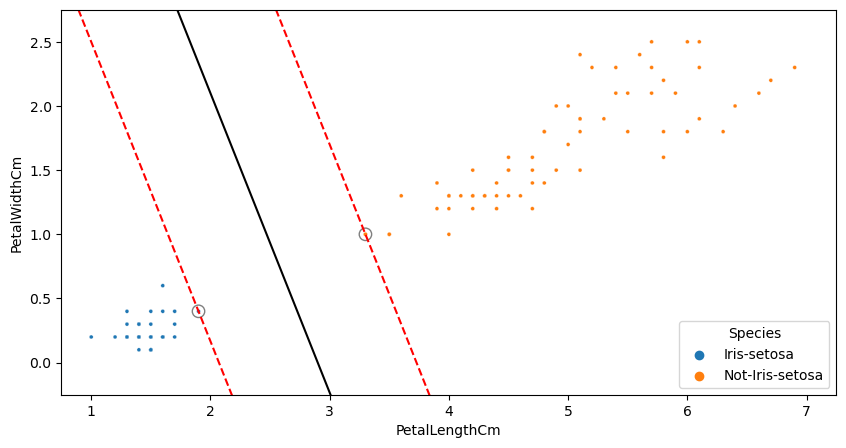

In [24]:
petals = ['PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10,5))

# creates a 2-dimensional svm classifier using PetalLengthCm and PetalWidthCm only
petal_model = svm.SVC(kernel='linear') 
petal_model.fit(X_train[petals], y_train)
y_pred_petal = petal_model.predict(X_test[petals])

sns.scatterplot(x=X_train[petals[0]], y=X_train[petals[1]], hue=y_train, s=8);

# builds & plots decision boundary hyperplane
w2 = petal_model.coef_[0]
w_hat2 = petal_model.coef_[0] / (np.sqrt(np.sum(petal_model.coef_[0] ** 2)))
b2 = petal_model.intercept_[0]
x_points2 = np.linspace(1, 7)
y_points2 = -(w2[0] / w2[1]) * x_points2 - b2 / w2[1]
plt.plot(x_points2, y_points2, c='black');

# circles support vectors
plt.scatter(petal_model.support_vectors_[:, 0], petal_model.support_vectors_[:, 1], 
            s=80, facecolors='none', edgecolors='k', alpha=.5);

# calculates & plots margin lines
margin2 = 1 / np.sqrt(np.sum(petal_model.coef_[0] ** 2))
decision_boundary_points2 = np.array(list(zip(x_points2, y_points2)))
points_of_line_above2 = decision_boundary_points2 + w_hat2 * margin2
points_of_line_below2 = decision_boundary_points2 - w_hat2 * margin2

plt.plot(points_of_line_above2[:, 0], points_of_line_above2[:, 1], 'r--', linewidth=1.5)
plt.plot(points_of_line_below2[:, 0], points_of_line_below2[:, 1], 'r--',linewidth=1.5)
plt.ylim(bottom=-0.25, top=2.75)
plt.xlim(left=0.75, right=7.25);

In [19]:
print("Sepal SVM metrics")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_sepal))
print("Precision:", metrics.precision_score(y_test, y_pred_sepal, pos_label='Iris-setosa'))
print("Recall:", metrics.recall_score(y_test, y_pred_sepal, pos_label='Iris-setosa'))

print("\nPetal SVM metrics")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_petal))
print("Precision:", metrics.precision_score(y_test, y_pred_petal, pos_label='Iris-setosa'))
print("Recall:", metrics.recall_score(y_test, y_pred_petal, pos_label='Iris-setosa'))

Sepal SVM metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Petal SVM metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
